https://www.theprojectspot.com/tutorial-post/ant-colony-optimization-for-hackers/10

In [1]:
import flask
import flask_wtf
import wtforms
from flask import redirect, url_for, render_template, request

import base64
from io import BytesIO
import io
import matplotlib.pyplot as plt
from io import BytesIO

import pandas as pd

In [2]:
import import_ipynb
import random
import TSP_ACO
import csv
import os

_colony_size = 5
_steps = 15
# _nodes = [(random.uniform(-400, 400), random.uniform(-400, 400)) for _ in range(0, 20)]
# print(_nodes)
# acs = TSP_ACO.SolveTSPUsingACO(mode='ACS', colony_size=_colony_size, steps=_steps, nodes=_nodes)
# sequence=acs.run()
# acs.plot()
# print (sequence)


importing Jupyter notebook from TSP_ACO.ipynb
importing Jupyter notebook from Edg_Object.ipynb
importing Jupyter notebook from Ant_Object.ipynb


In [3]:
app= flask.Flask("my_app")
app.config['FILE_UPLOADS'] = "C:\\Users\\97254\\PycharmProjects\\final_prj\\tsp_project\\static"
@app.route('/')
def home():
    return render_template("index.html", content='blaa')

@app.route('/test')
def test():
    return render_template("new_index.html", content='blaa')

@app.route('/login', methods=["POST", "GET"])
def login():
    data = []
    if request.method == "POST":

        if request.files:
            uploaded_file = request.files['file'] # This line uses the same variable and worked fine
            filepath = os.path.join(app.config['FILE_UPLOADS'], uploaded_file.filename)
            uploaded_file.save(filepath)
            with open(filepath) as file:
                csv_file = csv.reader(file)
                for row in csv_file:
                    data.append(tuple(list(map(float, row))))
        else:
            data = [(random.uniform(-400, 400), random.uniform(-400, 400)) for _ in range(0, 20)]   
        print (data)
        ants_num=int(request.form["ants_num"])
        iterations=int(request.form["iterations"])
        acs = TSP_ACO.SolveTSPUsingACO(mode='ACS', colony_size=ants_num, steps=iterations, nodes=data)
        sequence=acs.run()
        acs.plot()

     
        return redirect(url_for('user', ants_num=ants_num, iterations=iterations, name=sequence))
    else:
        return render_template("new_index.html")


@app.route('/<ants_num>?/<iterations>?/<name>?')
def user( ants_num=None, iterations=None, name=None):
    
    return render_template("bea.html", user_image= "foo.png", url='/static/images/plot.png', ants=ants_num, iterations=iterations, name=name)




 * Serving Flask app 'my_app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jun/2022 11:24:09] "GET /login HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2022 11:24:10] "GET /static/images/antsb.jpg HTTP/1.1" 304 -


[(-382.9871349, 287.4246336), (11.0755493, 360.7974171), (-267.0694114, 147.9245197), (-314.4533092, 340.703054), (7.032341318, -289.8877545), (296.9545287, 169.7124864), (98.05953321, 226.8754174), (-353.5097386, -202.9131593), (377.4120654, -271.2156223), (217.8461063, 205.2723408)]


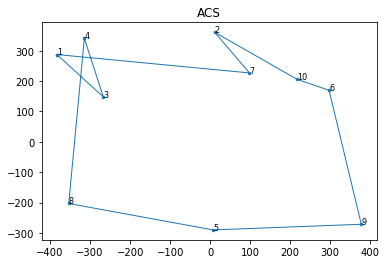

127.0.0.1 - - [13/Jun/2022 11:24:25] "POST /login HTTP/1.1" 302 -
127.0.0.1 - - [13/Jun/2022 11:24:25] "GET /6%3F/4%3F/Sequence%20:%20%3C-%201%20-%207%20-%202%20-%2010%20-%206%20-%209%20-%205%20-%208%20-%204%20-%203%20-%3E%3F HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2022 11:24:25] "GET /static/images/sectors.jpg HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2022 11:24:25] "GET /static/images/foo.png HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2022 11:24:25] "GET /static/images/plot.png HTTP/1.1" 200 -


<Figure size 432x288 with 0 Axes>

In [4]:
app.run()
#app.config['SECRET_KEY'] = 'ecf6e975838a2f7bf3c5dbe7d55ebe5b'  ###